<a href="https://colab.research.google.com/github/TrentDodge/SQC/blob/main/Ch13hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc


### 13.4

In [9]:
# factor A is bit size and factor B is speed and the response is vibration
data = pd.read_csv('https://raw.githubusercontent.com/TrentDodge/SQC/main/13.4.csv', sep=',', na_values=".")

data  

,Run,a,b,c,I,II
0,(1),-1,-1,-1,221,311
1,a,1,-1,-1,325,435
2,b,-1,1,-1,354,348
3,ab,1,1,-1,552,472
4,c,-1,-1,1,440,453
5,ac,1,-1,1,406,377
6,bc,-1,1,1,605,500
7,abc,1,1,1,392,419


In [10]:
df = data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Run     8 non-null      object
 1   a       8 non-null      int64 
 2   b       8 non-null      int64 
 3   c       8 non-null      int64 
 4   I       8 non-null      int64 
 5   II      8 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 512.0+ bytes


In [11]:
model = ols('I ~ C(a) +C(b) +C(c) + C(a):C(b)+ C(b):C(c) + C(a):C(c)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(a),378.125,1.0,0.040588,0.873437
C(b),32640.125,1.0,3.503616,0.312369
C(c),19110.125,1.0,2.051295,0.388035
C(a):C(b),903.125,1.0,0.096942,0.807842
C(b):C(c),5460.125,1.0,0.586094,0.584039
C(a):C(c),37675.125,1.0,4.044077,0.293774
Residual,9316.125,1.0,NaN,NaN


In [12]:
model1 = ols('II ~ C(a) +C(b) +C(c) + C(a):C(b) + C(b):C(c) + C(a):C(c)', data=df).fit()
aov_table = sm.stats.anova_lm(model1, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(a),1035.125,1.0,331.24,0.034944
C(b),3321.125,1.0,1062.76,0.019522
C(c),4186.125,1.0,1339.56,0.017390
C(a):C(b),3.125,1.0,1.00,0.500000
C(b):C(c),28.125,1.0,9.00,0.204833
C(a):C(c),20503.125,1.0,6561.00,0.007859
Residual,3.125,1.0,NaN,NaN


In [13]:
aa=df[['a']].to_numpy()
bb=df[['b']].to_numpy()
cc=df[['c']].to_numpy()
AB=aa*bb
AC=aa*cc
BC=bb*cc
ABC=aa*bb*cc
AB, AC, BC, ABC

(array([[ 1],
        [-1],
        [-1],
        [ 1],
        [ 1],
        [-1],
        [-1],
        [ 1]]), array([[ 1],
        [-1],
        [ 1],
        [-1],
        [-1],
        [ 1],
        [-1],
        [ 1]]), array([[ 1],
        [ 1],
        [-1],
        [-1],
        [-1],
        [-1],
        [ 1],
        [ 1]]), array([[-1],
        [ 1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [-1],
        [ 1]]))

In [14]:
df['AB']=AB
df['AC']=AC
df['BC']=BC
df['ABC']=ABC
X=df[['a', 'b', 'c', 'AB', 'AC', 'BC', 'ABC']]
X = sm.add_constant(X) # adding a constant
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,a,b,c,AB,AC,BC,ABC
0,1.0,-1,-1,-1,1,1,1,-1
1,1.0,1,-1,-1,-1,-1,1,1
2,1.0,-1,1,-1,-1,1,-1,1
3,1.0,1,1,-1,1,-1,-1,-1
4,1.0,-1,-1,1,1,-1,-1,1
5,1.0,1,-1,1,-1,1,-1,-1
6,1.0,-1,1,1,-1,-1,1,-1
7,1.0,1,1,1,1,1,1,1


In [15]:
Y=df[['I']]
Y

,I
0,221
1,325
2,354
3,552
4,440
5,406
6,605
7,392


In [16]:
Y1=df[['II']]
Y1

,II
0,311
1,435
2,348
3,472
4,453
5,377
6,500
7,419


In [17]:
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      I   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 03 Oct 2022   Prob (F-statistic):                nan
Time:                        12:01:17   Log-Likelihood:                 225.98
No. Observations:                   8   AIC:                            -436.0
Df Residuals:                       0   BIC:                            -435.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        411.8750        inf          0        n

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1729: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [18]:
res.resid

0    2.557954e-13
1    5.684342e-14
2    1.136868e-13
3    1.136868e-13
4    1.136868e-13
5    5.684342e-14
6    1.136868e-13
7    1.136868e-13
dtype: float64

In [19]:
model1 = sm.OLS(Y1, X)
res1=model1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                     II   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 03 Oct 2022   Prob (F-statistic):                nan
Time:                        12:01:17   Log-Likelihood:                 226.40
No. Observations:                   8   AIC:                            -436.8
Df Residuals:                       0   BIC:                            -436.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        414.3750        inf          0        n

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1729: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [20]:
res1.resid

0    2.273737e-13
1    0.000000e+00
2    1.136868e-13
3    5.684342e-14
4    1.136868e-13
5    0.000000e+00
6    1.705303e-13
7    1.136868e-13
dtype: float64

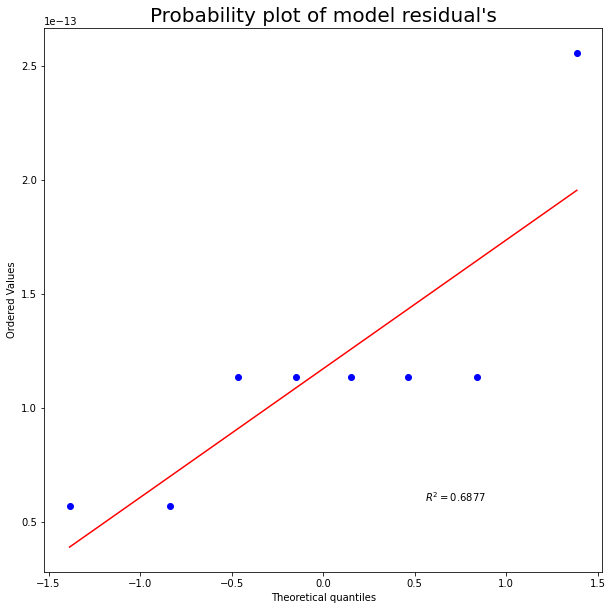

In [21]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

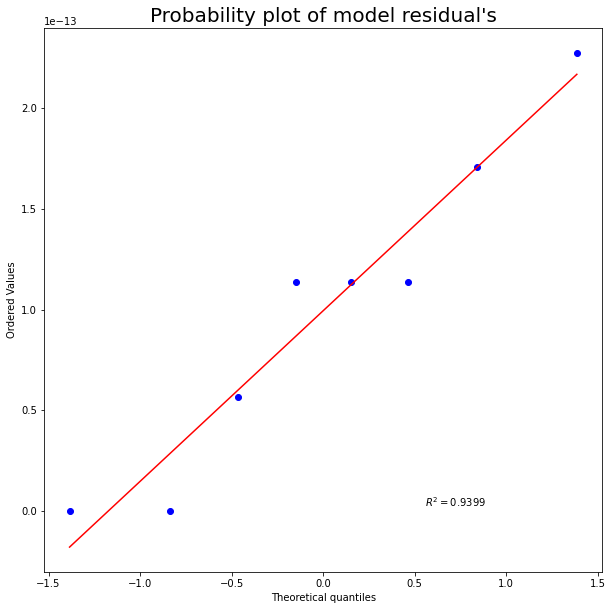

In [22]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res1.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [23]:
stats.levene(df['I'][df['a'] == -1],
             df['I'][df['a'] == 1])

LeveneResult(statistic=1.0579678957384855, pvalue=0.3433464983094215)

In [24]:
stats.levene(df['II'][df['a'] == -1],
             df['II'][df['a'] == 1])

LeveneResult(statistic=7.4161807042149555, pvalue=0.034492860436940755)

In [25]:
stats.levene(df['I'][df['b'] == -1],
             df['I'][df['b'] == 1])

LeveneResult(statistic=0.9837125748502994, pvalue=0.3595819497113229)

In [26]:
stats.levene(df['II'][df['b'] == -1],
             df['II'][df['b'] == 1])

LeveneResult(statistic=0.0029805667050828598, pvalue=0.9582339438312537)

In [27]:
stats.levene(df['I'][df['c'] == -1],
             df['I'][df['c'] == 1])

LeveneResult(statistic=0.20537854052402169, pvalue=0.6663415526041934)

In [28]:
stats.levene(df['II'][df['c'] == -1],
             df['II'][df['c'] == 1])

LeveneResult(statistic=1.8474752732951587, pvalue=0.22294324858018802)

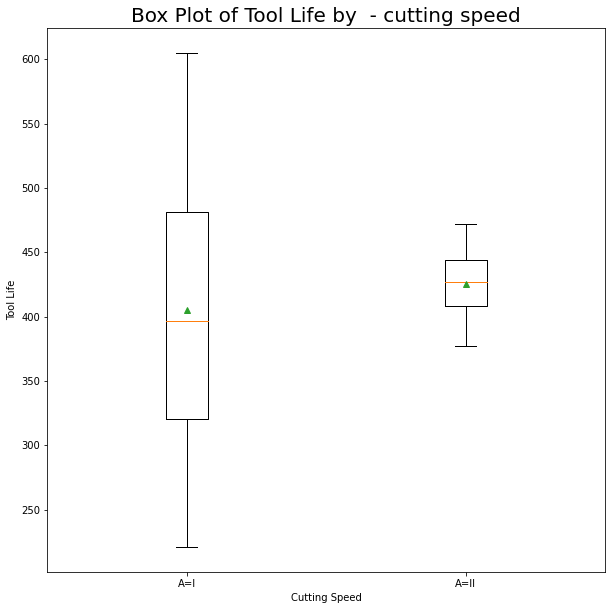

In [29]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Tool Life by  - cutting speed", fontsize= 20)
ax.set

data2 = [df['I'][df['a'] == -1],
             df['II'][df['a'] == 1]]


ax.boxplot(data2,
           labels= ['A=I', 'A=II'],
           showmeans= True)

plt.xlabel("Cutting Speed")
plt.ylabel("Tool Life")

plt.show()

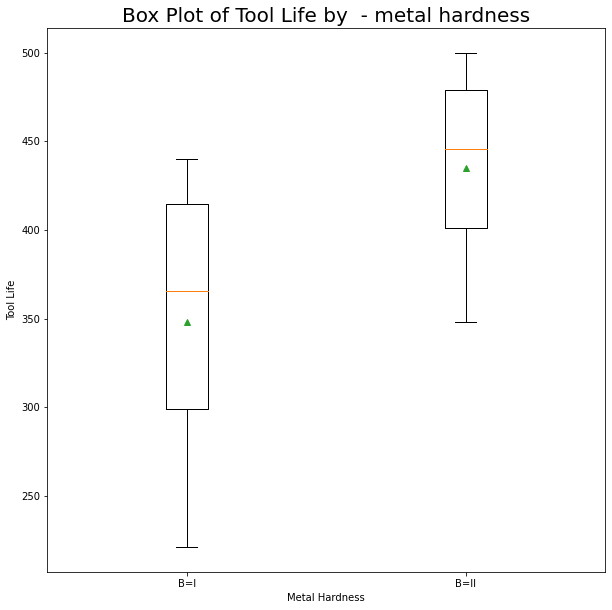

In [30]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Tool Life by  - metal hardness", fontsize= 20)
ax.set

data2 = [df['I'][df['b'] == -1],
             df['II'][df['b'] == 1]]


ax.boxplot(data2,
           labels= ['B=I', 'B=II'],
           showmeans= True)

plt.xlabel("Metal Hardness")
plt.ylabel("Tool Life")

plt.show()

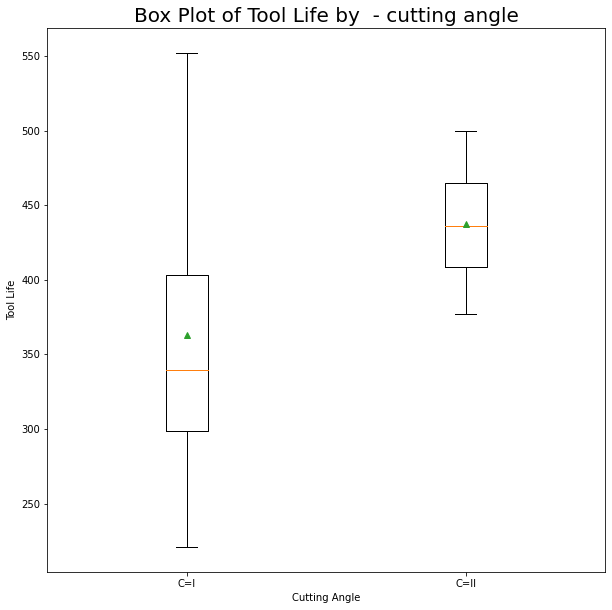

In [31]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Tool Life by  - cutting angle", fontsize= 20)
ax.set

data2 = [df['I'][df['c'] == -1],
             df['II'][df['c'] == 1]]


ax.boxplot(data2,
           labels= ['C=I', 'C=II'],
           showmeans= True)

plt.xlabel("Cutting Angle")
plt.ylabel("Tool Life")

plt.show()

In [32]:
eij=res.resid
eij

0    2.557954e-13
1    5.684342e-14
2    1.136868e-13
3    1.136868e-13
4    1.136868e-13
5    5.684342e-14
6    1.136868e-13
7    1.136868e-13
dtype: float64

In [33]:
N = len(eij)
c = list(range(0, N))
order = random.sample(c, N) # this should be replaced by the exact run order if the random order is not used
print('order of observations/residuals is')
print(order)

order of observations/residuals is
[3, 5, 1, 6, 4, 7, 2, 0]


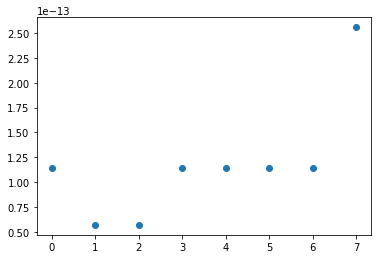

In [34]:
x = range(0,N) # from the first collected obs to the last in order
y = eij[order] # assign run order (see the previous code box)

plt.scatter(x, y)

In [35]:
eij1 = res1.resid
eij1

0    2.273737e-13
1    0.000000e+00
2    1.136868e-13
3    5.684342e-14
4    1.136868e-13
5    0.000000e+00
6    1.705303e-13
7    1.136868e-13
dtype: float64

In [36]:
N = len(eij)
c = list(range(0, N))
order = random.sample(c, N) # this should be replaced by the exact run order if the random order is not used
print('order of observations/residuals is')
print(order)

order of observations/residuals is
[1, 0, 4, 3, 7, 6, 2, 5]


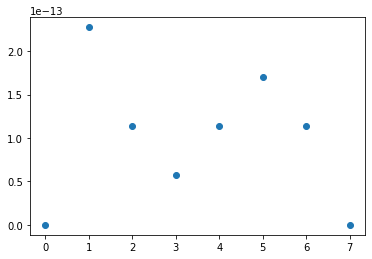

In [37]:
x = range(0,N) # from the first collected obs to the last in order
y = eij1[order] # assign run order (see the previous code box)

plt.scatter(x, y)

### 13.6

In [53]:
data = pd.read_csv('https://raw.githubusercontent.com/TrentDodge/SQC/main/13.6%20SQC.csv', sep=',', na_values=".")

data

,Run,a,b,c,d,I,II
0,(1),-1,-1,-1,-1,188,195
1,a,1,-1,-1,-1,172,180
2,b,-1,1,-1,-1,179,187
3,ab,1,1,-1,-1,185,178
4,c,-1,-1,1,-1,175,180
5,ac,1,-1,1,-1,183,178
6,bc,-1,1,1,-1,190,180
7,abc,1,1,1,-1,175,168
8,d,-1,-1,-1,1,200,193
9,ad,1,-1,-1,1,170,178


In [54]:
df = data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Run     16 non-null     object
 1   a       16 non-null     int64 
 2   b       16 non-null     int64 
 3   c       16 non-null     int64 
 4   d       16 non-null     int64 
 5   I       16 non-null     int64 
 6   II      16 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.0+ KB


In [57]:
model = ols('I ~ C(a) + C(b) + C(c) + C(d) + C(a):C(b) + C(a):C(c) + C(a):C(d) + C(b):C(c) + C(b):C(d) + C(c):C(d) + C(a):C(b):C(c) + C(a):C(b):C(c) + C(a):C(b):C(d) + C(a):C(c):C(d)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(a),441.00,1.0,10.855385,0.081075
C(b),0.25,1.0,0.006154,0.944615
C(c),2.25,1.0,0.055385,0.835847
C(d),121.00,1.0,2.978462,0.226521
C(a):C(b),64.00,1.0,1.575385,0.336208
C(a):C(c),4.00,1.0,0.098462,0.783388
C(a):C(d),156.25,1.0,3.846154,0.188893
C(b):C(c),12.25,1.0,0.301538,0.638039
C(b):C(d),36.00,1.0,0.886154,0.445891
C(c):C(d),4.00,1.0,0.098462,0.783388


In [58]:
model = ols('II ~ C(a) + C(b) + C(c) + C(d) + C(a):C(b) + C(a):C(c) + C(a):C(d) + C(b):C(c) + C(b):C(d) + C(c):C(d) + C(a):C(b):C(c) + C(a):C(b):C(c) + C(a):C(b):C(d) + C(a):C(c):C(d)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(a),232.5625,1.0,70.207547,0.013946
C(b),22.5625,1.0,6.811321,0.120785
C(c),150.0625,1.0,45.301887,0.021369
C(d),22.5625,1.0,6.811321,0.120785
C(a):C(b),68.0625,1.0,20.547170,0.045381
C(a):C(c),0.5625,1.0,0.169811,0.720249
C(a):C(d),14.0625,1.0,4.245283,0.175525
C(b):C(c),1.5625,1.0,0.471698,0.563148
C(b):C(d),27.5625,1.0,8.320755,0.102105
C(c):C(d),22.5625,1.0,6.811321,0.120785


In [67]:
aa=df[['a']].to_numpy()
bb=df[['b']].to_numpy()
cc=df[['c']].to_numpy()
dd=df[['d']].to_numpy()
ab=aa*bb
ac =aa*cc
ad=aa*dd
bc=bb*cc
bd=bb*dd
abc=aa*bb*cc
abcd=aa*bb*cc*dd
abd=aa*bb*dd
acd=aa*cc*dd
bcd=bb*cc*dd
abcd

array([[ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1]])

In [70]:
df['ab']=ab
X=df[['a', 'b', 'c', 'd', 'ab', 'abcd']]
X = sm.add_constant(X) # adding a constant
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,a,b,c,d,ab,abcd
0,1.0,-1,-1,-1,-1,1,1
1,1.0,1,-1,-1,-1,-1,-1
2,1.0,-1,1,-1,-1,-1,-1
3,1.0,1,1,-1,-1,1,1
4,1.0,-1,-1,1,-1,1,-1
5,1.0,1,-1,1,-1,-1,1
6,1.0,-1,1,1,-1,-1,1
7,1.0,1,1,1,-1,1,-1
8,1.0,-1,-1,-1,1,1,-1
9,1.0,1,-1,-1,1,-1,1


In [71]:
Y=df[['I']]
Y

,I
0,188
1,172
2,179
3,185
4,175
5,183
6,190
7,175
8,200
9,170


In [72]:
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      I   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     1.920
Date:                Mon, 03 Oct 2022   Prob (F-statistic):              0.182
Time:                        12:18:05   Log-Likelihood:                -50.780
No. Observations:                  16   AIC:                             115.6
Df Residuals:                       9   BIC:                             121.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        183.6250      1.928     95.266      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [73]:
res.resid

0     -1.75
1      0.50
2     -2.75
3      6.00
4    -11.75
5      7.00
6      3.75
7     -1.00
8      8.50
9    -10.75
10    -2.00
11     2.25
12     5.00
13     3.25
14     1.00
15    -7.25
dtype: float64

In [85]:
eij=res.resid
eij

0     3.5625
1     1.4375
2     3.1875
3    -3.4375
4    -4.1875
5     4.4375
6     1.1875
7    -6.1875
8     0.3125
9    -4.0625
10   -6.3125
11    5.3125
12    0.3125
13   -1.8125
14    1.9375
15    4.3125
dtype: float64

In [86]:
N = len(eij)
c = list(range(0, N))
order = random.sample(c, N) # this should be replaced by the exact run order if the random order is not used
print('order of observations/residuals is')
print(order)

order of observations/residuals is
[10, 6, 13, 5, 4, 15, 7, 3, 11, 14, 9, 8, 12, 0, 1, 2]


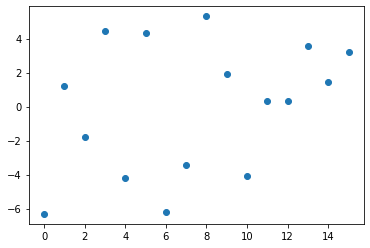

In [87]:
x = range(0,N) # from the first collected obs to the last in order
y = eij[order] # assign run order (see the previous code box)

plt.scatter(x, y)

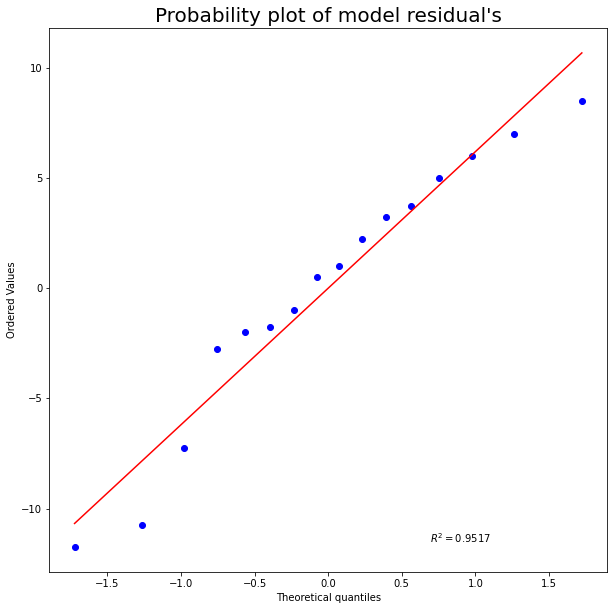

In [74]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [75]:
Y=df[['II']]
Y

,II
0,195
1,180
2,187
3,178
4,180
5,178
6,180
7,168
8,193
9,178


In [76]:
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     II   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     3.353
Date:                Mon, 03 Oct 2022   Prob (F-statistic):             0.0508
Time:                        12:21:10   Log-Likelihood:                -43.818
No. Observations:                  16   AIC:                             101.6
Df Residuals:                       9   BIC:                             107.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        181.9375      1.247    145.854      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [77]:
res.resid

0     3.5625
1     1.4375
2     3.1875
3    -3.4375
4    -4.1875
5     4.4375
6     1.1875
7    -6.1875
8     0.3125
9    -4.0625
10   -6.3125
11    5.3125
12    0.3125
13   -1.8125
14    1.9375
15    4.3125
dtype: float64

In [88]:
eij=res.resid
eij

0     3.5625
1     1.4375
2     3.1875
3    -3.4375
4    -4.1875
5     4.4375
6     1.1875
7    -6.1875
8     0.3125
9    -4.0625
10   -6.3125
11    5.3125
12    0.3125
13   -1.8125
14    1.9375
15    4.3125
dtype: float64

In [89]:
N = len(eij)
c = list(range(0, N))
order = random.sample(c, N) # this should be replaced by the exact run order if the random order is not used
print('order of observations/residuals is')
print(order)

order of observations/residuals is
[4, 10, 1, 2, 15, 9, 11, 8, 3, 5, 6, 0, 12, 14, 13, 7]


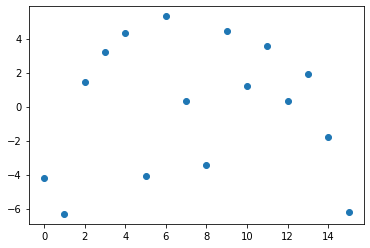

In [90]:
x = range(0,N) # from the first collected obs to the last in order
y = eij[order] # assign run order (see the previous code box)

plt.scatter(x, y)

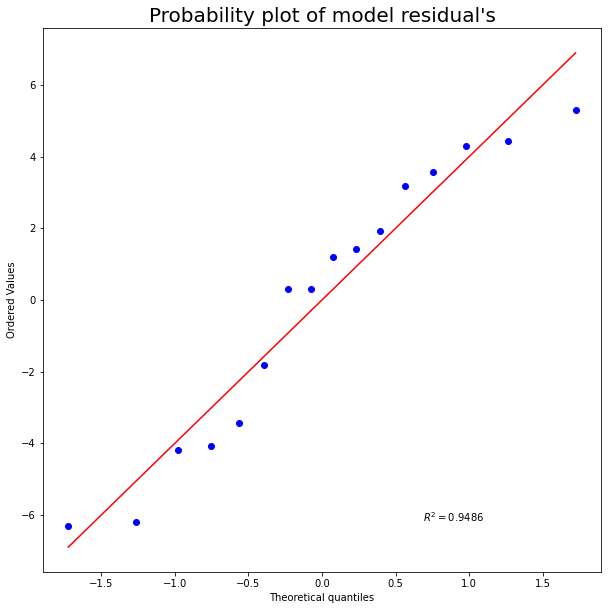

In [78]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

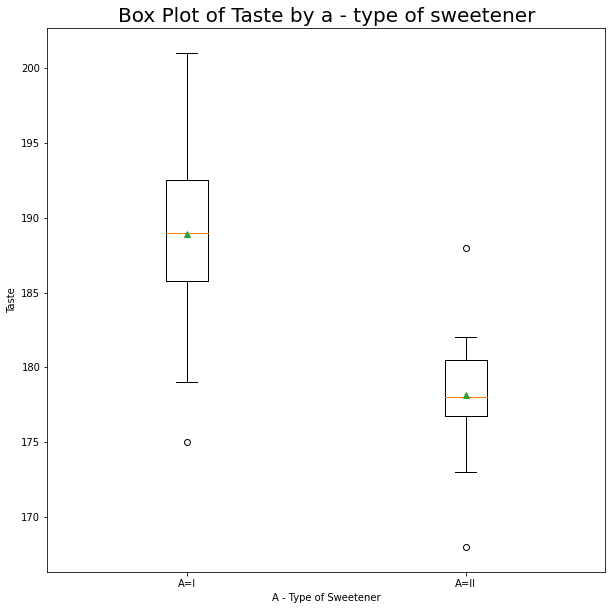

In [83]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Taste by a - type of sweetener", fontsize= 20)
ax.set

data2 = [df['I'][df['a'] == -1],
             df['II'][df['a'] == 1]]


ax.boxplot(data2,
           labels= ['A=I', 'A=II'],
           showmeans= True)

plt.xlabel("A - Type of Sweetener")
plt.ylabel("Taste")

plt.show()

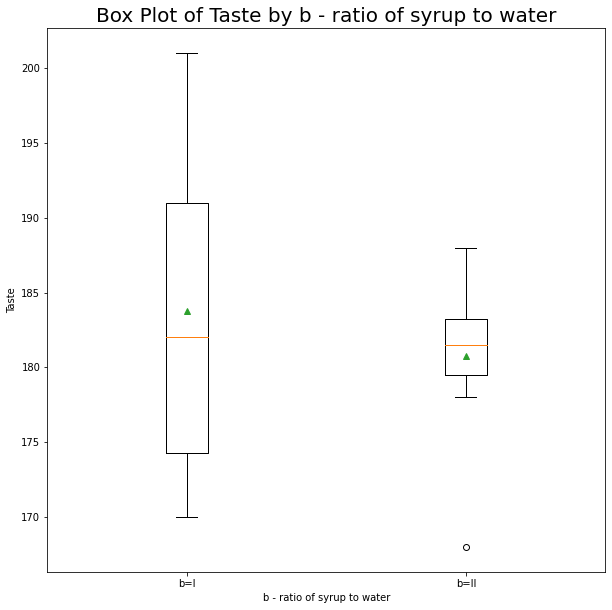

In [81]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Taste by b - ratio of syrup to water", fontsize= 20)
ax.set

data2 = [df['I'][df['b'] == -1],
             df['II'][df['b'] == 1]]


ax.boxplot(data2,
           labels= ['b=I', 'b=II'],
           showmeans= True)

plt.xlabel("b - ratio of syrup to water")
plt.ylabel("Taste")

plt.show()

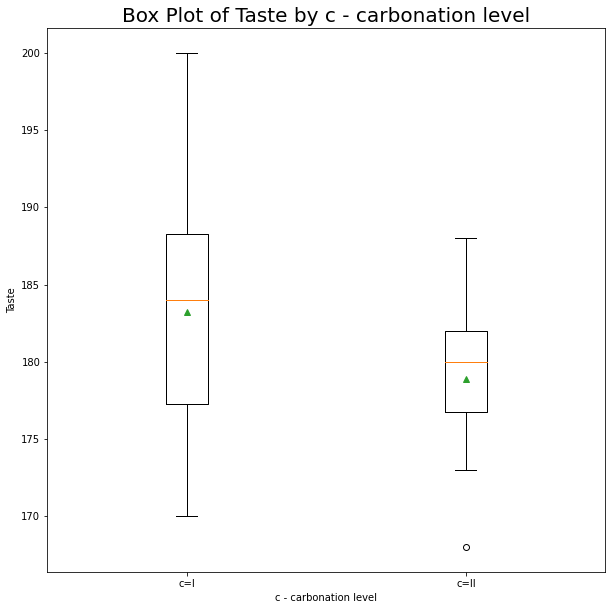

In [82]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Taste by c - carbonation level", fontsize= 20)
ax.set

data2 = [df['I'][df['c'] == -1],
             df['II'][df['c'] == 1]]


ax.boxplot(data2,
           labels= ['c=I', 'c=II'],
           showmeans= True)

plt.xlabel("c - carbonation level")
plt.ylabel("Taste")

plt.show()

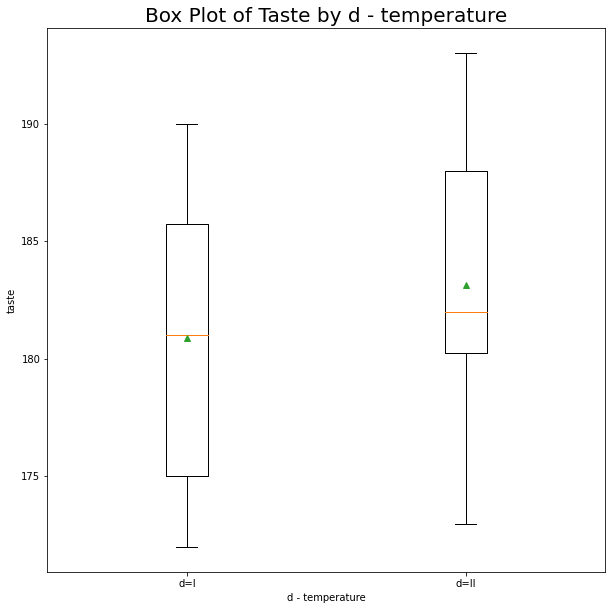

In [84]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Taste by d - temperature", fontsize= 20)
ax.set

data2 = [df['I'][df['d'] == -1],
             df['II'][df['d'] == 1]]


ax.boxplot(data2,
           labels= ['d=I', 'd=II'],
           showmeans= True)

plt.xlabel("d - temperature")
plt.ylabel("taste")

plt.show()